In [1]:
from sklearn import tree

#b1 Thu thập dữ liệu
#b2: Xu ly du lieu
#b3: Xay dung mo hinh
#b4: Dự đoán kết quả
#b5: dựa trên kết quả, đánh giá hiệu quả của mô hình

my_tree = tree.DecisionTreeClassifier()
dac_trung= [[1,3,3,7],
            [5,2,4,6],
            [1,2,4,6],  
            [5,4,4,3],
	        [1,4,4,7],
	        [3,2,3,7],
	        [3,3,3,6],
            [5,2,2,7]]
nhan = [0,1,1,0,0,0,0,1]
result = my_tree.fit(dac_trung,nhan)

du_doan = result.predict([[1,4,3,6]])
print(du_doan)


[0]


In [2]:
from sklearn import tree

my_tree = tree.DecisionTreeClassifier()
#suny hot 1  
# overcast mild 2
#rainy cool 3
#high strong 1
#normal weak 0
input_els = [[1,1,1,0],
         [1,1,1,1],
         [2,1,1,0],
         [3,2,1,0],
         [3,3,0,0],
         [3,3,0,1],
         [2,3,0,1],
         [1,2,1,0],
         [1,3,0,0],
         [3,2,0,1],
         [1,2,0,1],
         [2,2,1,1]]
input_result = [0,0,1,1,1,0,1,0,1,1,1,1]
result = my_tree.fit(input_els,input_result)

#rainy, mild, normal, weak [3,2,0,0]
predict = result.predict([[3,2,0,0]])
print(predict)



[1]


GINI: mức độ nhiễu

ENTROPY: mức độ thông tin  tín hiệu

tính - (tần suất * log(tần suất))

# GINI

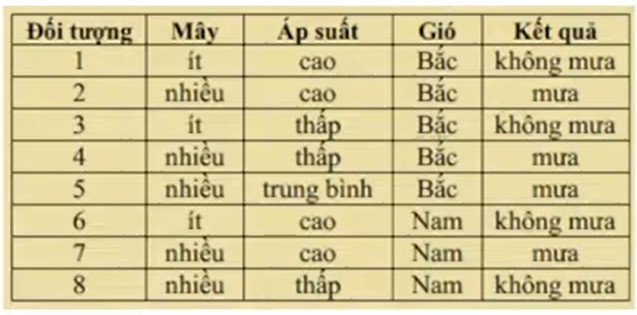

====== b1: gini thuoc tinh 

ct: 1 - [(khong mua)^2 + (mua)^2]

Gini(May-it) = 1-(3/3)^2 - (0/3)^2 = 0

Gini(May-nhieu) = 1-(1/5)^2 - (4/5)^2 = 0.32

--

Gini(Apsuat-cao) = 1-(2/4)^2 - (2/4)^2 = 0.5

Gini(Apsuat-thap) = 1-(2/3)^2 - (1/3)^2 = 0.44

Gini(Apsuat-tb) = 1-(0/1)^2 - (1/1)^2 = 0

--

Gini(Gio-b) =1-(2/5)^2 - (3/5)^2 = 0.48

Gini(Gio-n) =1-(2/3)^2 - (1/3)^2 = 0.44

====== b2: gini dac trung lon

Gini(May) = (3/8)xGini(May-it) + (5/8)xGini(May-nhieu) = (3/8)x0 + (5/8)x0.32 = 0.2

Gini(Apsuat) = (4/8)xGini(Apsuat-cao) + (3/8)xGini(Apsuat-thap) + (1/8) x Gini(Apsuat-tb) = (4/8)x0.5 + (3/8)x0.44 + (1/8) x 0 =0.415

Gini(Gio) = (5/8)xGini(Gio-b) + (3/8)xGini(Gio-n) = (5/8)x.48 + (3/8)x0.44 = 0.465

== KET LUAN, gini the hệ thôgn tin bị nhiễu cao hay thấp, càng thấp càng đúng


Chọn Mây làm root

Ít => 100%!

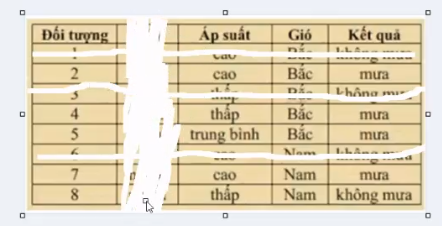

Nhiều => tiếp tục tính lại gini trên (loại bỏ mây ít)

== b1: Gini nho

Gini(Apsuat-cao) = 1-(0/2)^2 - (2/2)^2 = 0

Gini(Apsuat-thap) = 1-(1/2)^2 - (1/2)^2 = 0.5

Gini(Apsuat-tb) = 1-(0/1)^2 - (1/1)^2 = 0

--

Gini(Gio-b) =1-(0/3)^2 - (3/3)^2 = 0

Gini(Gio-n) =1-(1/2)^2 - (1/2)^2 = 0.5

== b2: Gini TO

Gini(Apsuat) = (2/5)xGini(Apsuat-cao) + (2/5)xGini(Apsuat-thap) + (1/5) x Gini(Apsuat-tb) = (2/5)x0 + (2/5)x0.5 + (1/5) x 0 = 0.2

Gini(Gio) = (3/5)xGini(Gio-b) + (2/5)xGini(Gio-n) = (3/5)x0 + (2/5)x0.5 = 0.2

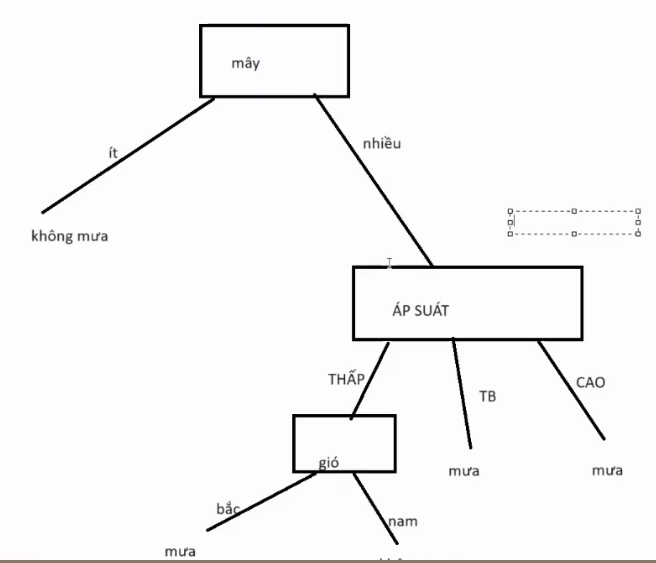

# Bai tap code GINI
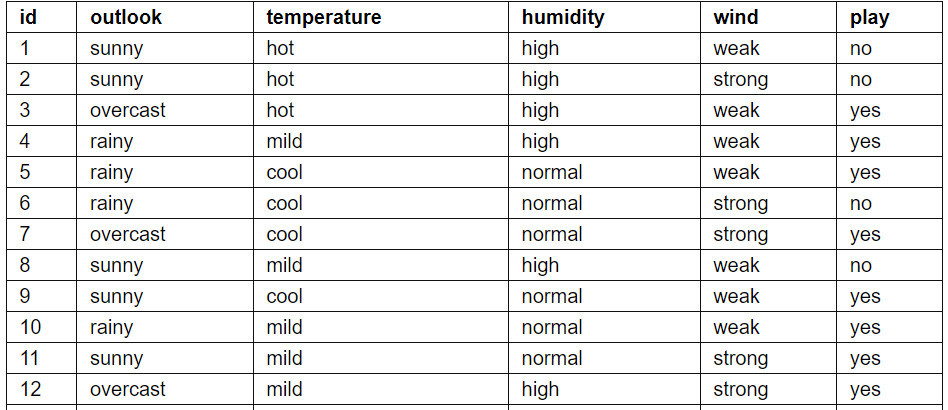

In [106]:
import pandas as pd

# data_forest = pd.DataFrame([[1,1,1,0,0],
#          [1,1,1,1,0],
#          [2,1,1,0,1],
#          [3,2,1,0,1],
#          [3,3,0,0,1],
#          [3,3,0,1,0],
#          [2,3,0,1,1],
#          [1,2,1,0,0],
#          [1,3,0,0,1],
#          [3,2,0,1,1],
#          [1,2,0,1,1],
#          [2,2,1,1,1]])

# data_tim = pd.DataFrame([[0, 1, 1, 2, 0],
#                          [2, 0, 2, 0, 1],
#                          [0, 0, 2, 0, 1],
#                          [2, 2, 2, 1, 0],
#                          [0, 2, 2, 2, 0],
#                          [1, 0, 1, 2, 0],
#                          [1, 1, 1, 0, 0],
#                          [2, 0, 0, 2, 1]])

data_tim = pd.DataFrame([[0, 0, 0, 0, 0],
                         [1, 1, 1, 1, 1],
                         [0, 1, 1, 1, 1],
                         [1, 2, 1, 2, 0],
                         [0, 2, 1, 0, 0],
                         [2, 1, 0, 0, 0],
                         [2, 0, 0, 1, 0],
                         [1, 1, 2, 0, 1]])
new = pd.DataFrame([[0,2,0,1],
                    [0,2,0,0]])

In [54]:
class TreeNode():
    def __init__(self) -> None:
        self.name = None
        self.left = None
        self.right = None

def gini_feature_attr(data, feature_id, feature_attr):
    # 1 - [(label1/total)^2 + (label2/total)^2]
    frequencies = []
    p = 0
    
    for label_attr in set(data[4]):
        frequencies.append(len(data.loc[(data[feature_id] == feature_attr) & (data[4] == label_attr)]))
        
    for fre in frequencies:
        p += (fre/sum(frequencies))**2
        
    return 1-p

def gini_feature(data, feature_id):
    gini = 0
    feature_attrs = set(data[feature_id])
    dict_gini_feature_attr = {}
    
    for feature_attr in feature_attrs:
        value_gini_feature_attr = gini_feature_attr(data, feature_id, feature_attr)
        
        dict_gini_feature_attr.update({ feature_attr: value_gini_feature_attr})
        
        proportion = len(data.loc[data[feature_id] == feature_attr]) / len(data[feature_id])
        
        gini += proportion*value_gini_feature_attr
        
    return gini,  dict_gini_feature_attr

def find_leaf(gini_feature_attr):
    key_with_min_value = min(gini_feature_attr, key=lambda k: gini_feature_attr[k])

    return key_with_min_value
    
def find_root(data):
    gini_list = []
    list_gini_feature_attr = []
    node = TreeNode()
    
    for label in range(0,len(data.columns)-1):
        gini, gini_feature_attr = gini_feature(data, label)
        gini_list.append(gini)
        list_gini_feature_attr.append(gini_feature_attr)
    
    # print(list_gini_feature_attr)
    min_gini = min(gini_list)

    node.name = gini_list.index(min_gini)
    leaf = find_leaf(list_gini_feature_attr[node.name])
    
    label_leaf_df = data.loc[data[node.name] == leaf][len(data.columns)-1]
    label_leaf = label_leaf_df.value_counts()
    
    node.left = {leaf: label_leaf.index[0]}
    
    data_remain = data.loc[~((data[node.name] == leaf) & (data[len(data.columns)-1] == node.left[leaf]))]
    print(f"root: {node.name} - Loai(attr: {leaf} - label: {node.left})")
    print(data_remain)
    
    if len(data_remain) <4:
        node.right = 1-node.left[leaf]
    else:
        node.right = find_root(data_remain)
    
    return node

def find_root_demo(data):
    gini_list = []
    list_gini_feature_attr = []
    node = TreeNode()
    
    for label in range(0,len(data.columns)-1):
        gini, gini_feature_attr = gini_feature(data, label)
        gini_list.append(gini)
        list_gini_feature_attr.append(gini_feature_attr)
    
    # print(list_gini_feature_attr)
    min_gini = min(gini_list)

    node.name = gini_list.index(min_gini)
    
    leaf = find_leaf(list_gini_feature_attr[node.name])
    label_leaf_df = data.loc[data[node.name] == leaf][len(data.columns)-1]
    label_leaf = label_leaf_df.value_counts()
    
    node.left = label_leaf.index[0]
    
    data_remain = data.loc[~((data[node.name] == leaf) & (data[len(data.columns)-1] == node.left))]
    # print(f"root: {node.name} - Loai(attr: {leaf} - label: {node.left})")
    # print(data_remain)
    
    # if len(data_remain) <4:
    #     node.right = 1-node.left
    # else:
    #     node.right = find_root(data_remain)
    
    return node, data_remain

In [45]:
# gini(cannang - 0)
print(f"gini(cannang-0): {gini_feature_attr(data_tim,0,0)}")
print(f"gini(cannang-1): {gini_feature_attr(data_tim,0,1)}")
print(f"gini(cannang-2): {gini_feature_attr(data_tim,0,2)}")

print(f"gini(cannang): {gini_feature(data_tim,0)}")
print(f"gini(Chieucao): {gini_feature(data_tim,1)}")
print(f"gini(Huyetap): {gini_feature(data_tim,2)}")
print(f"gini(Vandong): {gini_feature(data_tim,3)}")


gini(cannang-0): 0.4444444444444444
gini(cannang-1): 0.4444444444444444
gini(cannang-2): 0.0
gini(cannang): (0.3333333333333333, {0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.0})
gini(Chieucao): (0.1875, {0: 0.0, 1: 0.375, 2: 0.0})
gini(Huyetap): (0.25, {0: 0.0, 1: 0.5, 2: 0.0})
gini(Vandong): (0.35416666666666663, {0: 0.375, 1: 0.4444444444444444, 2: 0.0})


In [26]:
root, data_conlai = find_root_demo(data_tim)
data_conlai

,0,1,2,3,4
1,1,1,1,1,1
2,0,1,1,1,1
3,1,2,1,2,0
4,0,2,1,0,0
5,2,1,0,0,0
7,1,1,2,0,1


In [27]:
print(f"gini(cannang): {gini_feature(data_conlai,0)}")
print(f"gini(Chieucao): {gini_feature(data_conlai,1)}")
print(f"gini(Huyetap): {gini_feature(data_conlai,2)}")
print(f"gini(Vandong): {gini_feature(data_conlai,3)}")

gini(cannang): (0.38888888888888884, {0: 0.5, 1: 0.4444444444444444, 2: 0.0})
gini(Chieucao): (0.25, {1: 0.375, 2: 0.0})
gini(Huyetap): (0.3333333333333333, {0: 0.0, 1: 0.5, 2: 0.0})
gini(Vandong): (0.2222222222222222, {0: 0.4444444444444444, 1: 0.0, 2: 0.0})


In [28]:
root, data_conlai2 = find_root_demo(data_conlai)
data_conlai2

,0,1,2,3,4
3,1,2,1,2,0
4,0,2,1,0,0
5,2,1,0,0,0
7,1,1,2,0,1


In [29]:
print(f"gini(cannang): {gini_feature(data_conlai2,0)}")
print(f"gini(Chieucao): {gini_feature(data_conlai2,1)}")
print(f"gini(Huyetap): {gini_feature(data_conlai2,2)}")
print(f"gini(Vandong): {gini_feature(data_conlai2,3)}")

gini(cannang): (0.25, {0: 0.0, 1: 0.5, 2: 0.0})
gini(Chieucao): (0.25, {1: 0.5, 2: 0.0})
gini(Huyetap): (0.0, {0: 0.0, 1: 0.0, 2: 0.0})
gini(Vandong): (0.3333333333333333, {0: 0.4444444444444444, 2: 0.0})


In [55]:
decisiontree = find_root(data_tim)

root: 1 - Loai(attr: 0 - label: {0: 0})
   0  1  2  3  4
1  1  1  1  1  1
2  0  1  1  1  1
3  1  2  1  2  0
4  0  2  1  0  0
5  2  1  0  0  0
7  1  1  2  0  1
root: 3 - Loai(attr: 1 - label: {1: 1})
   0  1  2  3  4
3  1  2  1  2  0
4  0  2  1  0  0
5  2  1  0  0  0
7  1  1  2  0  1
root: 2 - Loai(attr: 0 - label: {0: 0})
   0  1  2  3  4
3  1  2  1  2  0
4  0  2  1  0  0
7  1  1  2  0  1


In [107]:
result = 0
def predict(predict_data, decisiontree):
    global result
    node = decisiontree.name
    value_predict = predict_data[1][node]
    label_predict= decisiontree.left.get(value_predict)
    # print(label_predict)
    
    if  isinstance(decisiontree.right, int):
        result = decisiontree.right
        return 
    elif label_predict != None:
        result = label_predict
        return
    # print(predict_data[0], label_predict)
    predict(predict_data, decisiontree.right)
    return result

for row in new.iterrows():
    print(predict(row,decisiontree))

1
0


In [56]:
print(decisiontree.name)
print(decisiontree.left)
print(decisiontree.right)

print(decisiontree.right.name)
print(decisiontree.right.left)
print(decisiontree.right.right)

print(decisiontree.right.right.name)
print(decisiontree.right.right.left)
print(decisiontree.right.right.right)

1
{0: 0}
3
{1: 1}
2
{0: 0}
1


In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

data_mua = pd.DataFrame([["ít", "cao", "Bắc", "không"],
                         ["nhiều", "cao", "Bắc", "mưa"],
                         ["ít", "thấp", "Bắc", "không"],
                         ["nhiều", "thấp", "Bắc", "mưa"],
                         ["nhiều", "trung bình", "Bắc", "mưa"],
                         ["ít", "cao", "Nam", "không"],
                         ["nhiều", "cao", "Nam", "mưa"],
                         ["nhiều", "thấp", "Nam", "không"]])

In [49]:
# chuyen doi gia tri
data_mua[0] = data_mua[0].map({"nhiều": 1, "ít": 0})
data_mua[1] = data_mua[1].map({"cao": 2, "thấp": 0, "trung bình": 1})
data_mua[2] = data_mua[2].map({"Bắc": 0, "Nam": 1})
data_mua[3] = data_mua[3].map({"mưa": 1, "không": 0})
data_mua

,0,1,2,3
0,0,2,0,0
1,1,2,0,1
2,0,0,0,0
3,1,0,0,1
4,1,1,0,1
5,0,2,1,0
6,1,2,1,1
7,1,0,1,0


In [50]:
# tach du lieu
x = data_mua.drop(3, axis=1)
y = data_mua[3]

In [51]:
# chia du lieu ttrain test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train

,0,1,2
1,1,2,0
6,1,2,1
0,0,2,0
4,1,1,0
3,1,0,0
5,0,2,1


In [52]:
# xay mo hinh GINI
model_gini = DecisionTreeClassifier(criterion='gini', random_state=1)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
# Du doan
y_pred_gini = model_gini.predict(x_test)
y_pred_gini

array([1, 0])

In [57]:
# tính điểm
# print(confusion_matrix(y_test,y_pred_gini))
print(accuracy_score(y_test,y_pred_gini))
print(classification_report(y_test,y_pred_gini))


0.5
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/home/tranlam/Documents/.env_python/demo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tranlam/Documents/.env_python/demo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tranlam/Documents/.env_python/demo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# ENTROPY

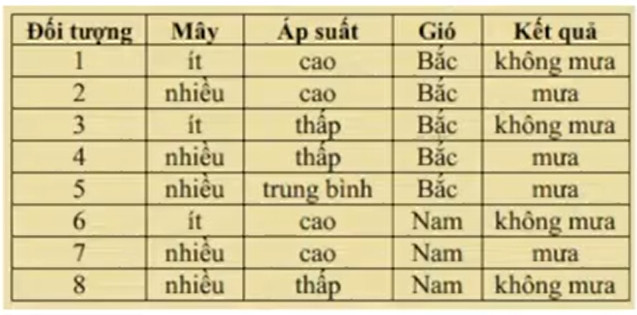

#### 1.tính entropy tổng của labels (kết quả)

Entropy(S-label) = -[Tần suất * log2(tần suất)(không mưa) + ...(mưa)]

        = -[(4/8)*log2(4/8)+(4/8)*log2(4/8)]

        = 1

#### 2.tính average entropy

AE(Mây) = 4/8(Entropy(Sv-không mưa))          + 4/8(Entropy(Sv-mua))

        = 4/8(-[3/4*log2(3/4)+1/4*log2(1/4)]) + 4/8(-[4/4*log2(4/4)])

        = 0.4056

AE(Áp suất) = 4/8(Entropy(Sv-không mưa))        + 4/8(Entropy(Sv-mua))

        = 4/8(2 cao + 2 thấp)                   + 4/8(2cao + 1tb +1 thấp)

        = 4/8(-[2/4*log2(2/4) + 2/4*log2(2/4)]) + 4/8(-[2/4*log2(2/4)+1/4*log2(1/4)+1/4*log2(1/4)])
        
        = 1.25

AE(Gió) = 4/8(Entropy(Sv-không mưa))            + 4/8(Entropy(Sv-mua))

        = 4/8(2 bắc + 2 nam)                    + 4/8(3 bắc + 1nam)

        = 4/8(-[2/4*log2(2/4) + 2/4*log2(2/4)]) + 4/8(-[3/4*log2(3/4)+1/4*log2(1/4)])
        
        = 0.9056

#### 3.Tính tới chỉ số thông tin mang lại của từng thuộc tính

Gain(A) = Entropy(S-label) - AE(S)

Gain(Mây) = 1 - 0.4056 => xác định root

Gain(Áp suất) = 1 - 1.25

Gain(Gió) = 1 - 0.9056

#### 4. xác định attr
Entropy(Mây-ít) = 3 không mưa / 3 ít 

                = -[3/3*log2(3/3)]

Entropy(Mây-nhiều) = 1 không mưa / 5 nhiều + 4 mưa / 5 nhiều

                = -[1/5*log2(1/5)+4/5*log2(4/5)]

In [96]:
# # Đọc dữ liệu từ file văn bản
file_path = './DataTim.csv'  # Thay đổi đường dẫn tới file của bạn
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()


# # Phân tích dữ liệu vào danh sách văn bản và nhãn
data = []
for line in lines:
    line = line.strip().split(',')  # Giả sử dữ liệu được phân tách bằng dấu tab
   
    if len(line) == 6:  # Kiểm tra xem mỗi dòng có đúng định dạng không
        # text, label = line
        data.append(line)

# # Chuyển dữ liệu thành DataFrame (đối với dữ liệu thực, đọc từ file CSV hoặc database)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.DataFrame(data[1:], columns=data[0])
print(df)
# # Tạo vectơ TF-IDF từ dữ liệu chuỗi
tfidf_vectorizer = TfidfVectorizer()
tfidf_data = tfidf_vectorizer.fit_transform(df['Bệnh Tim'])
print(tfidf_data)

  Thứ tự    Cân nặng   Chiều cao    Huyết áp    Vận động Bệnh Tim
0      1         nhẹ  trung bình  trung bình       Nhiều    không
1      2        nặng        thấp         Cao          Ít       Có
2      3         nhẹ        thấp         Cao          Ít       Có
3      4        nặng         cao         Cao  Trung Bình    không
4      5         nhẹ         cao         Cao       Nhiều    không
5      6  trung bình        thấp  trung bình       Nhiều    không
6      7  trung bình  trung bình  trung bình          Ít    không
7      8        nặng        thấp        Thấp       Nhiều       Có
  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
